# Documentation
1. **Introduction**   
2. **Libraries**
   - **Data Manipulation**
   - **Data Visualization**
   - **Preprocessing**
   - **Machine Learning**
   - **Deep Learning**
3. **Data Loading and Cleaning**
   - **Load Data**
   - **Check Data**
   - **Preprocessing**
4. **Exploratory Data Analysis**
   - **Visualizations**
   - **Tokenization and Lemmatization**
5. **Model Building**
   - **Baseline Models**
   - **Fine Tuning Models**
   - **References**

# Introduction
Sentiment analysis is key in natural language processing (NLP) for identifying emotions in text. With the rise of online content, it's crucial for understanding public opinion. IMDb, with its extensive user reviews, serves as an excellent dataset for sentiment analysis, providing valuable insights into audience perceptions that benefit filmmakers, studios, and enthusiasts.

This project focuses on conducting sentiment analysis on a dataset of IMDB movie reviews. The main goal is to preprocess the text data, visualize sentiment distribution, and develop predictive models to classify reviews as either positive or negative. To accomplish this, we will utilize various data cleaning methods, perform exploratory data analysis, and apply different machine learning algorithms. The effectiveness of these models will be assessed using accuracy and other performance metrics to identify the best approach for sentiment classification.

# Libraries

In [1]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

# Library for preprocessing 
import re,string,unicodedata
import contractions
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import itertools
import collections
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
import math
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk import pos_tag
from gensim import corpora
from gensim.parsing.preprocessing import preprocess_string
from pprint import pprint
from joblib import Parallel, delayed

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
# Load the data into pandas dataframe
df=pd.read_csv("IMDB Dataset.csv")

# View the first few rows of the data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# DATA WRANGLING

## Cleaning and Preprocessing

In [3]:
# Check the shape of the data
df.shape

(50000, 2)

In [4]:
# Check the general data characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Check for columns with missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# Check for duplicated rows
df.duplicated().sum()

418

In [7]:
# Remove the duplicates from the data
df.drop_duplicates(inplace=True)
# Recheck the shape
df.shape

(49582, 2)

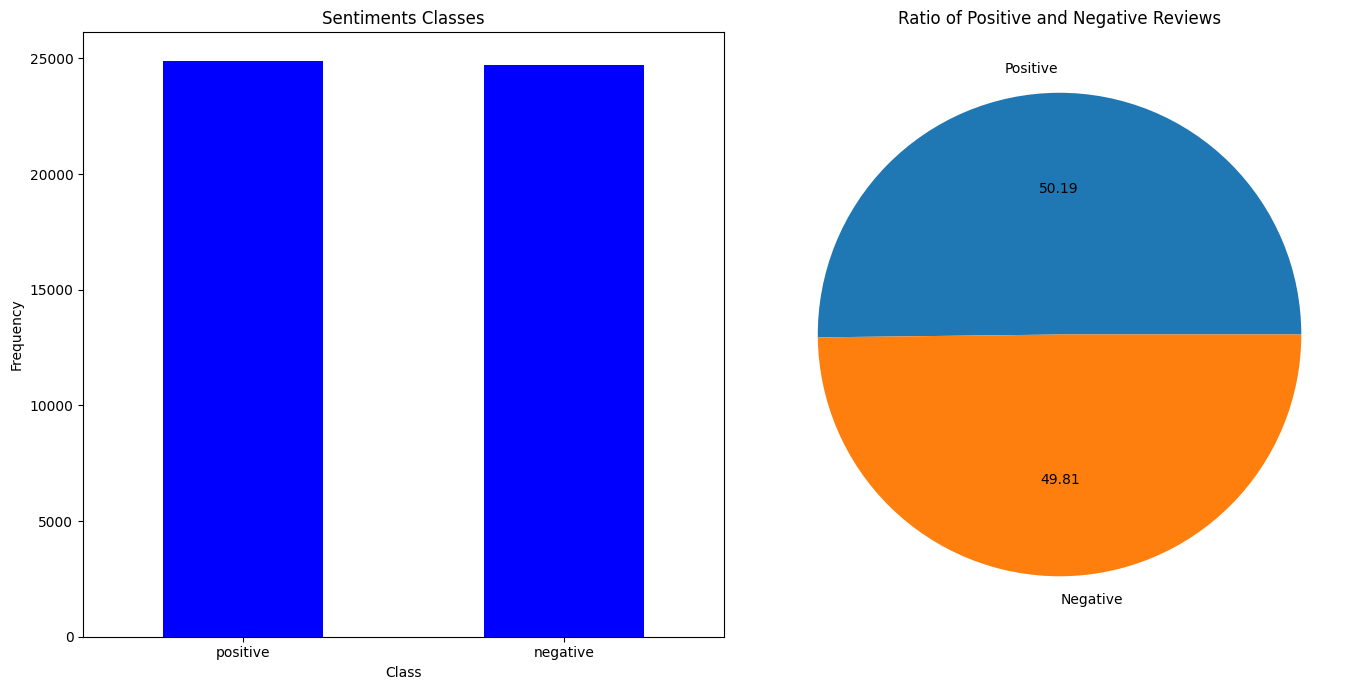

In [8]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot value counts of sentiments as a bar chart
df["sentiment"].value_counts().plot(kind="bar", xlabel="Class", ylabel="Frequency", color='blue', ax=axes[0])
axes[0].set_title("Sentiments Classes")
axes[0].tick_params(axis='x', rotation=360)  # Rotate the x-tick labels by 45 degrees

# Plot the ratio of positive and negative reviews as a pie chart with custom colors
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for the pie chart
axes[1].pie(df["sentiment"].value_counts(), labels=["Positive", "Negative"], autopct="%.2f", colors=colors)
axes[1].set_title("Ratio of Positive and Negative Reviews")

# Display the plots
plt.tight_layout()
#plt.savefig('Sentiment_Classes.png')
plt.show()


In [10]:
# Function to remove accented characters
def remove_accent(text):
    try:
        text = str(text)
        normalized_text = unicodedata.normalize('NFD', text)
        ascii_text = normalized_text.encode('ascii', 'ignore').decode("utf-8")
        return ascii_text
    except UnicodeDecodeError:
        return ""
# Apply the function to the reviews column
df['review'] = df['review'].apply(remove_accent)
# check the results
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
# Function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)
# Apply the function
df['review'] = df['review'].apply(remove_numbers)
# check the results
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
# Function to remove punctuations
def remove_punctuation(text):
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# Apply the function
df['review'] = df['review'].apply(remove_punctuation)
# Check the result
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [13]:
# Function to remove special characters
def remove_special_characters(text):
    # Replace non-alphanumeric characters with spaces
    return re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
# Apply the function
df['review'] = df['review'].apply(remove_special_characters)
# check the result
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [14]:
# Function to convert text to lowercase
def case_folding(text):
    # Convert text to lowercase
    return text.lower()
# Apply the function
df['review'] = df['review'].apply(case_folding)
# check the result
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [15]:
#Expansion of contractions
contractions.contractions_dict
# Function to expand contractions within the text, such as converting "don't" to "do not" or "I'm" to "I am"
def expand_contractions(text):
    # Expand contractions
    expanded_text = contractions.fix(text)
    return expanded_text
# Apply the function
df['review'] = df['review'].apply(expand_contractions)
# check the result
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


In [16]:
# Removal of stop words
# Load the default set of stopwords and add 'br' to it
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.add('br')

# Function to remove stopwords
def remove_stop_words(text):
    # Use the modified stop_words set that includes 'br'
    words = text.split()  # Split the text into words without tokenization
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    return ' '.join(filtered_words)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_stop_words)

# Print the first few rows of the DataFrame to check the results
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter matteis love time money visually stunni...,positive


In [17]:
# Inspect part of the preprocessed text
print(df['review'][0], "\n")

one reviewers mentioned watching oz episode hooked right exactly happened mebr first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches

## Tokenization and Lemmatization 

In [18]:
# Function to tokenize the text (i.e., break down sentences into individual words, known as tokens)
def tokenize(text):
    # Tokenize the text
    return word_tokenize(text)
# Apply the function and add it's column to the dataframe
df['tokens'] = df['review'].apply(tokenize)
# Check the result
df.head()

,review,sentiment,tokens
0,one reviewers mentioned watching oz episode ho...,positive,"[one, reviewers, mentioned, watching, oz, epis..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [19]:
# Lemmatization
# Load SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize (reduce words to thier most basic root form) and remove white spaces
def lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_space]
    return lemmatized_tokens

# Apply lemmatization to the 'review' column, and add a column for 'lemmatized tokens' on the dataframe
df['lemmatized_tokens'] = df['review'].apply(lemmatize)

# Remove rows where lemmatized_tokens is empty (only white spaces)
df = df[df['lemmatized_tokens'].apply(lambda x: bool(x))]

# Convert the list of lemmatized tokens to a string without white spaces, add a column for 'lemmatized texts' on the dataframe
df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Check the result
df.head()

,review,sentiment,tokens,lemmatized_tokens,lemmatized_text
0,one reviewers mentioned watching oz episode ho...,positive,"[one, reviewers, mentioned, watching, oz, epis...","[one, reviewer, mention, watch, oz, episode, h...",one reviewer mention watch oz episode hook rig...
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[think, wonderful, way, spend, time, hot, summ...",think wonderful way spend time hot summer week...
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...","[basically, family, little, boy, jake, think, ...",basically family little boy jake think zombie ...
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


# EXPLORATORY DATA ANALYSIS

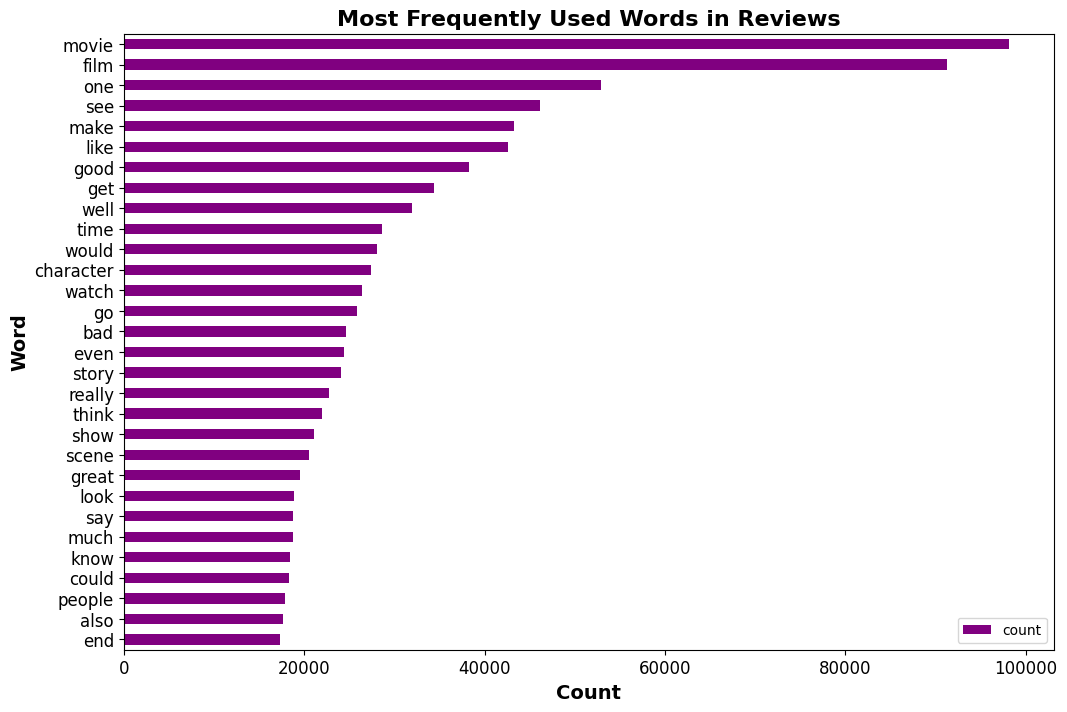

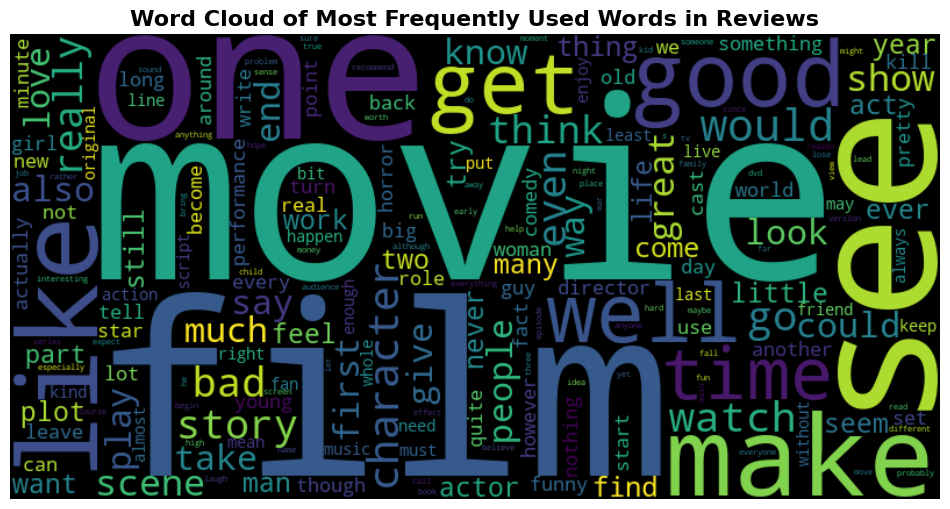

In [20]:
# Get and store the list of the lemmatized tokens
lemmatized_tokens = list(df["lemmatized_tokens"])

# Flatten the list of lists
token_list = list(itertools.chain(*lemmatized_tokens))

# Count the occurrences of each token
counts_no = collections.Counter(token_list)

# Create a DataFrame with the most common words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['word', 'count'])

# Plot the most common words
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='word', y='count', ax=ax, color="purple")

# Customize font sizes and bolding
ax.set_title("Most Frequently Used Words in Reviews", fontsize=16, fontweight='bold')
ax.set_xlabel("Count", fontsize=14, fontweight='bold')
ax.set_ylabel("Word", fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_weight('bold')
#plt.savefig('Frequent_words.png')
plt.show()

# Generate a word cloud for the most frequently used words in the review
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(counts_no)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Customize the title with increased font size and boldness
plt.title("Word Cloud of Most Frequently Used Words in Reviews", fontsize=16, fontweight='bold')

#plt.savefig('wordcloud_all.png', dpi=500)
plt.show()

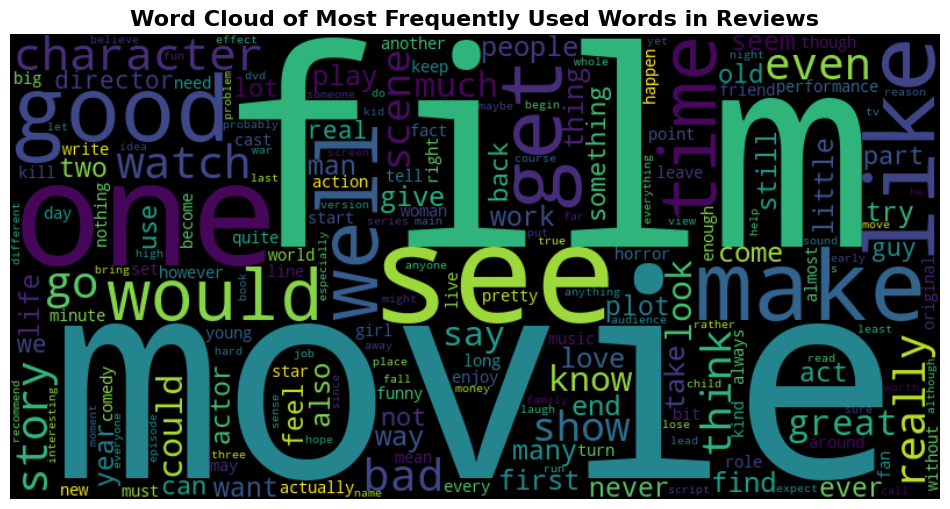

In [21]:
# Generate a word cloud for the most frequently used words in the review
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(counts_no)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Customize the title with increased font size and boldness
plt.title("Word Cloud of Most Frequently Used Words in Reviews", fontsize=16, fontweight='bold')

#plt.savefig('wordcloud_all.png', dpi=500)
plt.show()

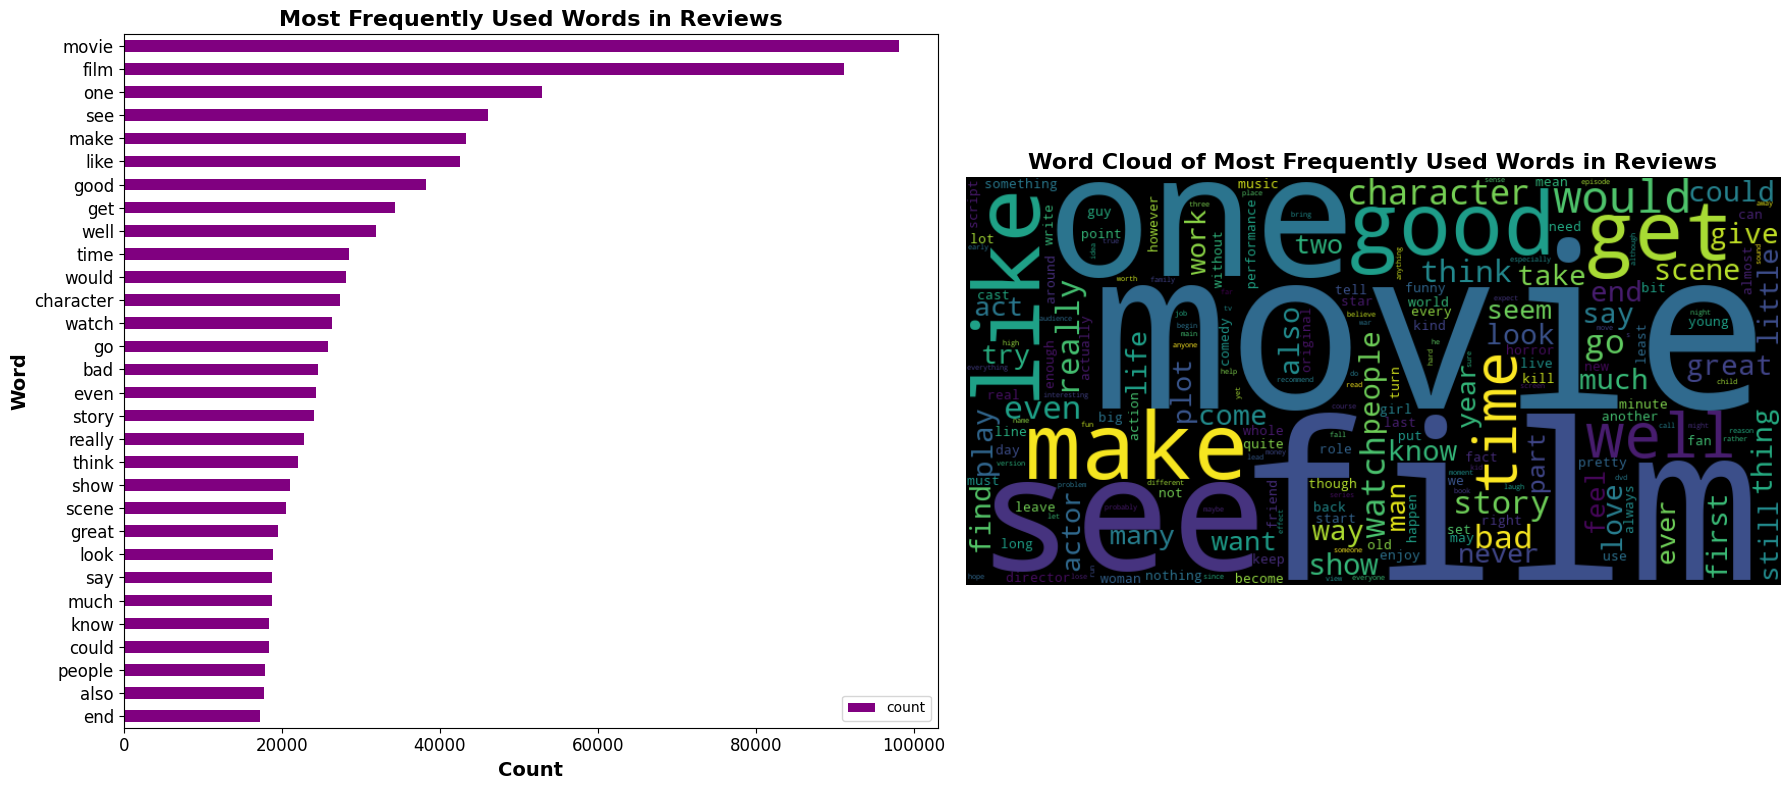

In [22]:
# Get and store the list of the lemmatized tokens
lemmatized_tokens = list(df["lemmatized_tokens"])

# Flatten the list of lists
token_list = list(itertools.chain(*lemmatized_tokens))

# Count the occurrences of each token
counts_no = collections.Counter(token_list)

# Create a DataFrame with the most common words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['word', 'count'])

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the most common words as a horizontal bar chart
clean_reviews.sort_values(by='count').plot.barh(x='word', y='count', ax=axes[0], color="purple")

# Customize font sizes and bolding for the bar chart
axes[0].set_title("Most Frequently Used Words in Reviews", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Count", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Word", fontsize=14, fontweight='bold')
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].xaxis.label.set_weight('bold')
axes[0].yaxis.label.set_weight('bold')

# Generate a word cloud for the most frequently used words in the review
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(counts_no)

# Plot the word cloud
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')  # Hide axes for the word cloud
axes[1].set_title("Word Cloud of Most Frequently Used Words in Reviews", fontsize=16, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined plot to your computer
#plt.savefig('combined_most_frequent_plot.png', dpi=300)

# Show the combined plot
plt.show()


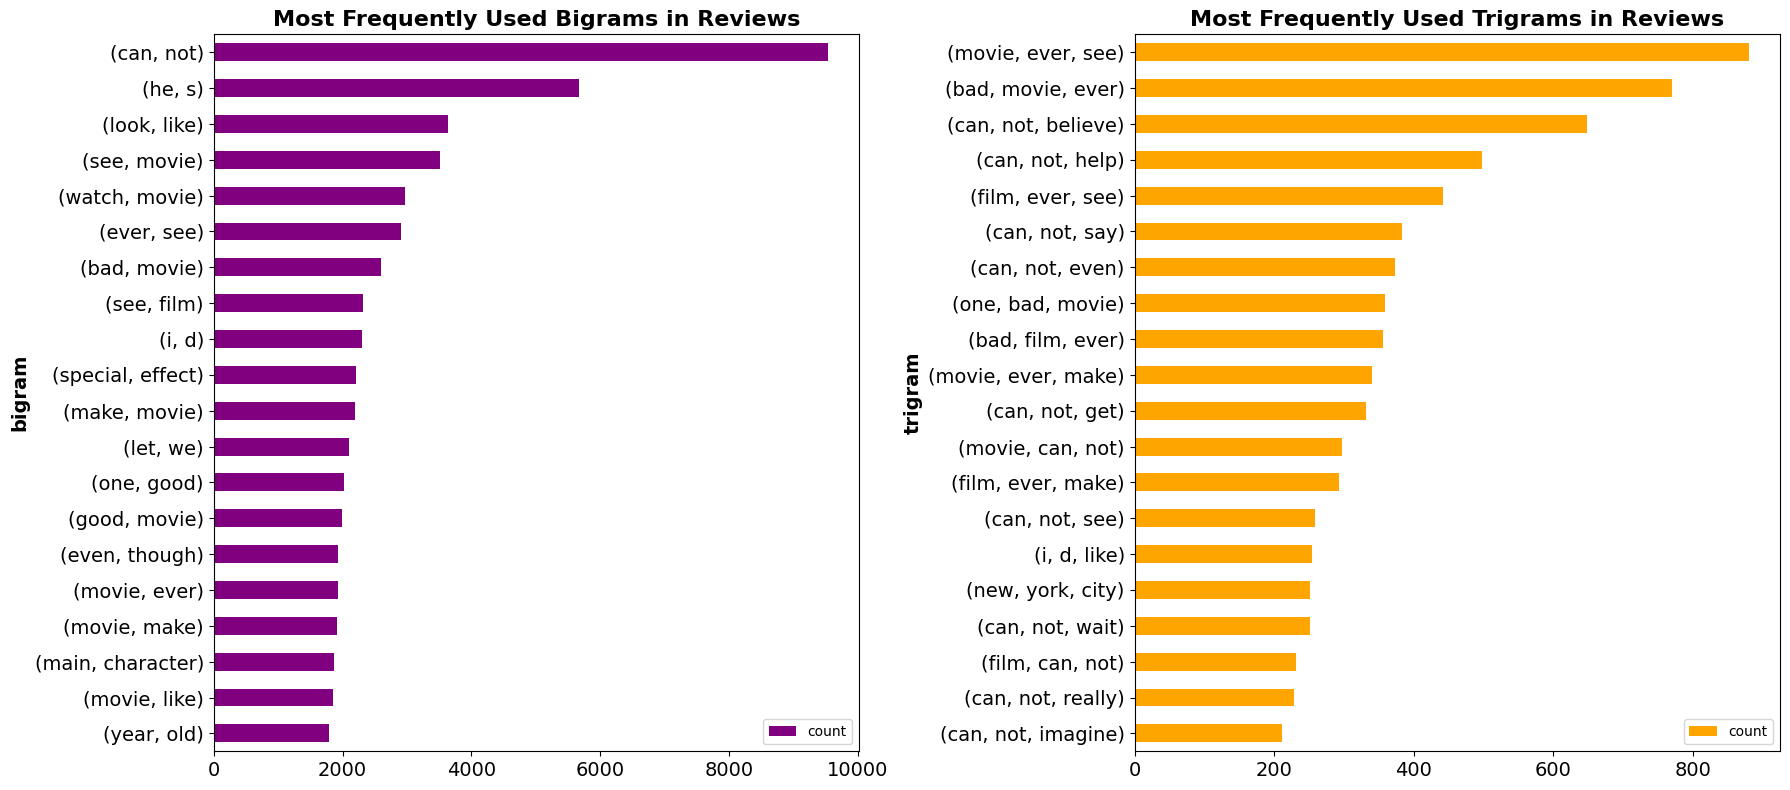

In [23]:
# Extract bigrams from `token_list`
bigrams = list(zip(token_list, token_list[1:]))
counts_bigrams = collections.Counter(bigrams)

# Extract trigrams from `token_list`
trigrams = list(zip(token_list, token_list[1:], token_list[2:]))
counts_trigrams = collections.Counter(trigrams)

# Convert the bigram counts to DataFrame
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

# Convert the trigram counts to DataFrame
trigram_df = pd.DataFrame(counts_trigrams.most_common(20), columns=['trigram', 'count'])

# Plot the bigram frequencies
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

bigram_df.sort_values(by='count').plot.barh(x='bigram', y='count', ax=ax[0], color="purple")
ax[0].set_title("Most Frequently Used Bigrams in Reviews", fontsize=16, fontweight='bold')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].xaxis.label.set_size(14)
ax[0].yaxis.label.set_size(14)
ax[0].xaxis.label.set_weight('bold')
ax[0].yaxis.label.set_weight('bold')

# Plot the trigram frequencies
trigram_df.sort_values(by='count').plot.barh(x='trigram', y='count', ax=ax[1], color="orange")
ax[1].set_title("Most Frequently Used Trigrams in Reviews", fontsize=16, fontweight='bold')
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].xaxis.label.set_size(14)
ax[1].yaxis.label.set_size(14)
ax[1].xaxis.label.set_weight('bold')
ax[1].yaxis.label.set_weight('bold')

plt.tight_layout()
#plt.savefig('bigrams_trigrams.png')
plt.show()

# MODEL BUILDING

## Libraries

In [81]:
from tensorflow.keras.preprocessing import text, sequence
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, Bidirectional
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

## Baseline Models

### Traditional Models

#### Extract and Split Data into Training and Test Sets

In [25]:
# Separate features and labels
X = df['lemmatized_text']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [26]:
%%time
# Create a machine learning pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('vect', CountVectorizer()),        # Convert text to a matrix of token counts
    ('tfidf', TfidfTransformer()),      # Transform counts to TF-IDF scores
    ('clf', LogisticRegression(max_iter=1000)),  # Logistic Regression model with increased iterations
])

# Train the model
lr_pipeline.fit(X_train, y_train)

CPU times: total: 3.89 s
Wall time: 6.15 s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=1000))])

In [27]:
# Make predictions on the test set
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the results
print("Logistic Regression Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.8858525763839871
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4939
    positive       0.87      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



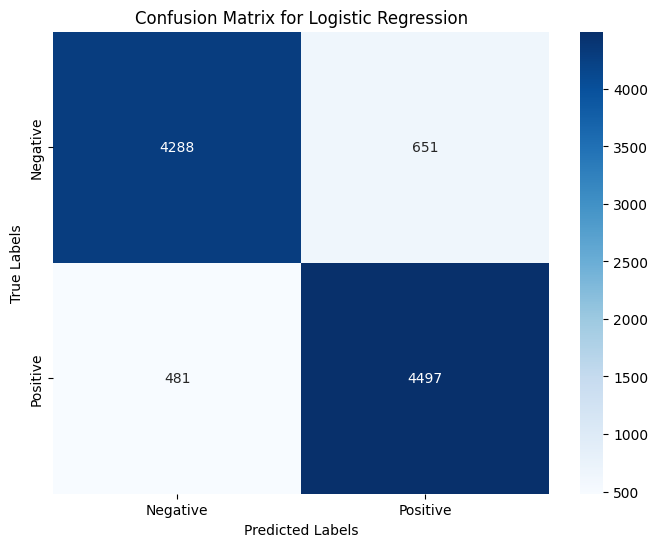

In [28]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('LR_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

#### Naive Bayes

In [29]:
%%time
# Create a machine learning pipeline for Naive Bayes
nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),        # Convert text to a matrix of token counts
    ('tfidf', TfidfTransformer()),      # Transform counts to TF-IDF scores
    ('clf', MultinomialNB()),           # Naive Bayes classifier
])

# Train the model
nb_pipeline.fit(X_train, y_train)

CPU times: total: 2.45 s
Wall time: 4.11 s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [30]:
# Make predictions on the test set
y_pred_nb = nb_pipeline.predict(X_test)

# Evaluate the results
print("Naive Bayes Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb)}')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results:
Accuracy: 0.8630634264394474
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4939
    positive       0.87      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



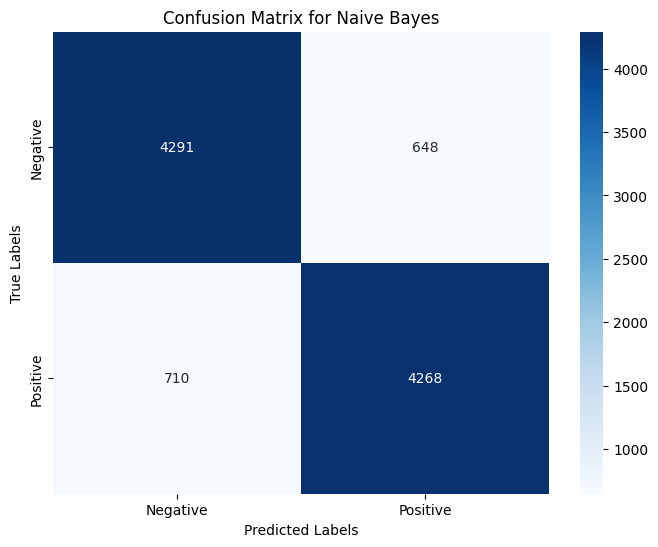

In [82]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('NB_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

### Deep Learning Models

In [32]:
# Extract the required lemmatized data
X1 = df['lemmatized_text']
y1 = df['sentiment']

In [33]:
# Display the first few rows
X1.head()

0    one reviewer mention watch oz episode hook rig...
1    wonderful little production filming technique ...
2    think wonderful way spend time hot summer week...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: lemmatized_text, dtype: object

#### Data Splitting, Tokenization and Padding

In [34]:
#splitting for model building
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

# find the length of the largest sentence in training data
# max_len = train_x1.apply(lambda x: len(x)).max()
# print(f'Max number of words in a text in training data: {max_len}')

In [35]:
# Define the maximum number of words to keep in the vocabulary
max_words = 5000
# Define the maximum length of each sequence (number of words per input)
max_length = 100 

# Create a tokenizer that will keep only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words = max_words)
# Fit the tokenizer on the training text data (learn the vocabulary from the training set)
tokenizer.fit_on_texts(train_x1)

# Convert the training and test text data to sequences of integers (each word gets replaced by its index in the vocabulary)
train_x1_sequences = tokenizer.texts_to_sequences(train_x1)
test_x1_sequences = tokenizer.texts_to_sequences(test_x1)
word_index = tokenizer.word_index

# Pad the training and test sequences to ensure they all have the same length (max_length).
# 'post' padding/truncating adds/removes tokens from the end of the sequences if they are too short/long.
train_x1_padded = pad_sequences(train_x1_sequences, maxlen=max_length, padding='post', truncating='post')
test_x1_padded = pad_sequences(test_x1_sequences, maxlen=max_length, padding='post', truncating='post')

In [36]:
# Display an example of the original text, its corresponding sequence of word indices before padding, 
# and the sequence of indices after padding to visualize the preprocessing steps.
print('text example:', train_x1[0])
print('sequence of indices(before padding):',train_x1_sequences[0])
print('sequence of indices(after padding):', train_x1_padded[0])

text example: one reviewer mention watch oz episode hook right exactly happen mebr first thing strike oz brutality unflinche scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy high agenda city home manyaryans muslim gangstas latinos christians italian irish moreso scuffle death stare dodgy dealing shady agreement never far awaybr would say main appeal show due fact go show would dare forget pretty picture paint mainstream audience forget charm forget romanceoz mess around first episode ever saw strike nasty surreal could say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience 

#### Encode Labels

In [37]:
# Mapping for String labels
train_y1 = train_y1.map({'negative': 0, 'positive': 1})
test_y1 = test_y1.map({'negative': 0, 'positive': 1})

#### Long Short - Term Memory (LSTM)

In [38]:
# LSTM
model_LSTM = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation = "sigmoid")
])
model_LSTM.build(input_shape=(None, max_length))
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 701,857 (2.68 MB)

 Trainable params: 701,857 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
%%time
# Training the model
history1 = model_LSTM.fit(train_x1_padded, train_y1, epochs=5, batch_size=32, validation_data=(test_x1_padded, test_y1))

Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 94s 72ms/step - accuracy: 0.5979 - loss: 0.6464 - val_accuracy: 0.7940 - val_loss: 0.4695
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 137s 66ms/step - accuracy: 0.8132 - loss: 0.4366 - val_accuracy: 0.8593 - val_loss: 0.3359
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.8818 - loss: 0.2963 - val_accuracy: 0.8671 - val_loss: 0.3218
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 90s 73ms/step - accuracy: 0.9088 - loss: 0.2435 - val_accuracy: 0.8662 - val_loss: 0.3318
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 91s 74ms/step - accuracy: 0.9290 - loss: 0.1922 - val_accuracy: 0.8636 - val_loss: 0.3396
CPU times: total: 8min 9s
Wall time: 8min 16s


In [40]:
lstm_pred = (model_LSTM.predict(test_x1_padded) > 0.5).astype(int)
print("LSTM:\n", classification_report(test_y1, lstm_pred, target_names=['negative', 'positive']))

310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
LSTM:
               precision    recall  f1-score   support

    negative       0.88      0.85      0.86      4939
    positive       0.85      0.88      0.87      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



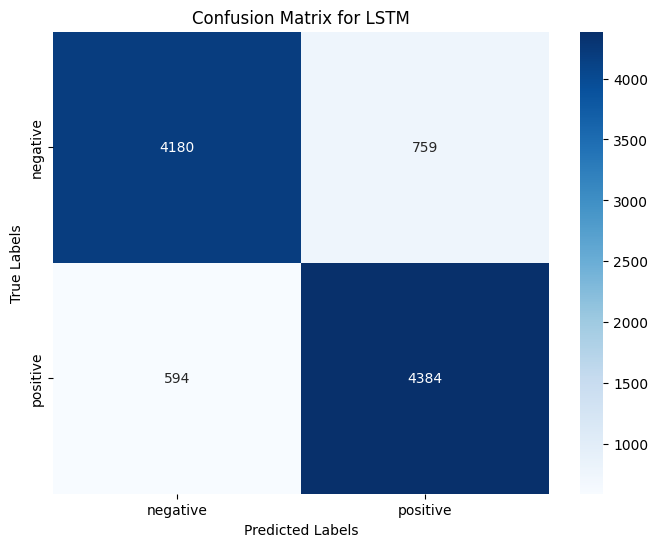

In [41]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y1, lstm_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix for LSTM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('LSTM_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

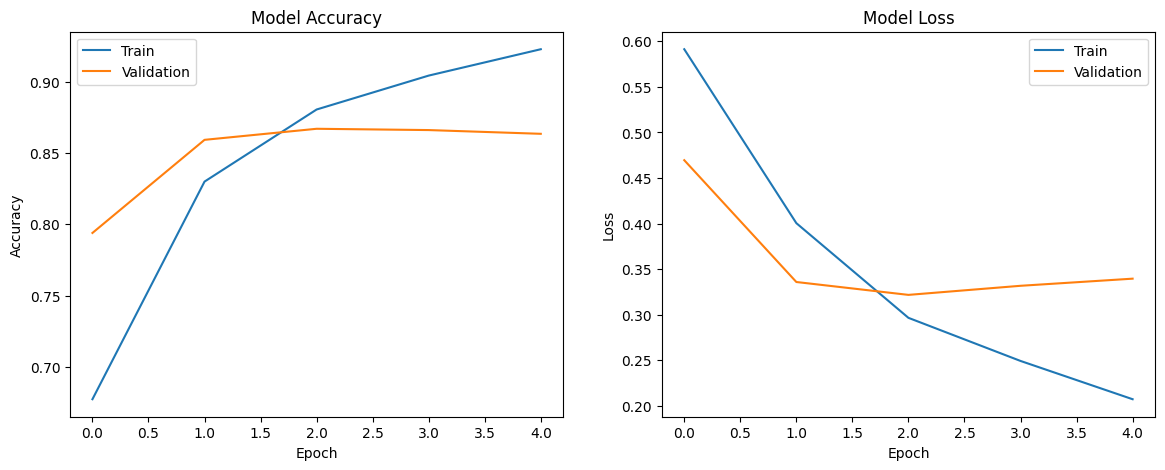

In [42]:
# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns, adjust figure size as needed

# Plot training & validation accuracy values on the first subplot
ax[0].plot(history1.history['accuracy'])
ax[0].plot(history1.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values on the second subplot
ax[1].plot(history1.history['loss'])
ax[1].plot(history1.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

# Save the plot
plt.savefig('LSTM_Loss_Accuracy.png')

# Display the plots
plt.show()


#### Gated Recurrent Unit (GRU)

In [43]:
# GRU Model
model_GRU = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model_GRU.build(input_shape=(None, max_length))
model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_GRU.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 100, 64)             │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 686,689 (2.62 MB)

 Trainable params: 686,689 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
%%time
# Training the model
history2 = model_GRU.fit(train_x1_padded, train_y1, epochs=5, batch_size=32, validation_data=(test_x1_padded, test_y1))

Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 111s 81ms/step - accuracy: 0.5335 - loss: 0.6799 - val_accuracy: 0.7951 - val_loss: 0.4548
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 100s 81ms/step - accuracy: 0.8473 - loss: 0.3560 - val_accuracy: 0.8609 - val_loss: 0.3201
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 101s 82ms/step - accuracy: 0.9038 - loss: 0.2452 - val_accuracy: 0.8612 - val_loss: 0.3226
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 100s 81ms/step - accuracy: 0.9239 - loss: 0.2072 - val_accuracy: 0.8553 - val_loss: 0.3521
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 102s 82ms/step - accuracy: 0.9422 - loss: 0.1649 - val_accuracy: 0.8590 - val_loss: 0.3734
CPU times: total: 8min 3s
Wall time: 8min 34s


In [45]:
# Make predictions
gru_pred = (model_GRU.predict(test_x1_padded) > 0.5).astype(int)

# Classification report
print("GRU:\n", classification_report(test_y1, gru_pred, target_names=['negative', 'positive']))

310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
GRU:
               precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4939
    positive       0.86      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



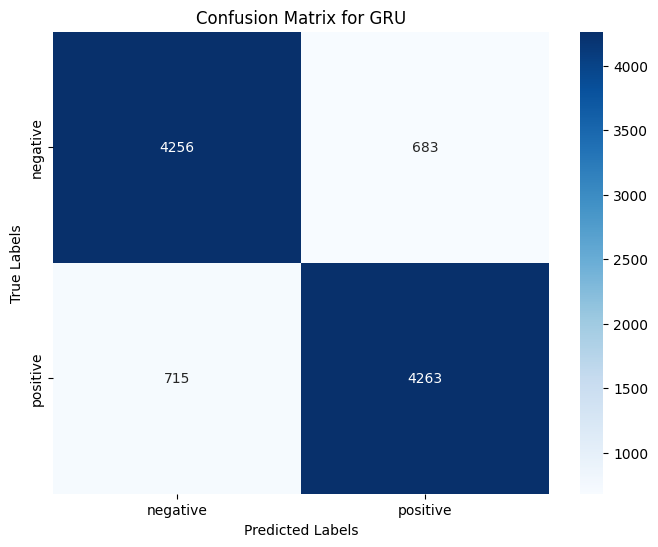

In [46]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y1, gru_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix for GRU')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('GRU_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

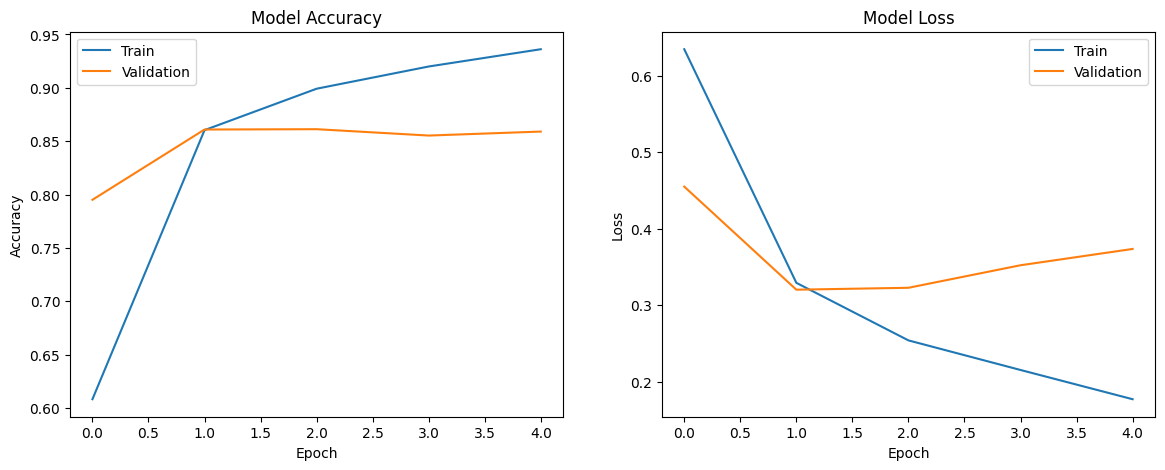

In [47]:
# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns, adjust figure size as needed

# Plot training & validation accuracy values on the first subplot
ax[0].plot(history2.history['accuracy'])
ax[0].plot(history2.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values on the second subplot
ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

# Save the plot
plt.savefig('GRU_Loss_Accuracy.png')

# Display the plots
plt.show()


## Models' Fine Tuning

### Traditiona Models

#### Logistic Regression Hypertuning

In [48]:
%%time
# Create a pipeline
lr_pipeline = Pipeline([
    ('vect', CountVectorizer()),        # Convert text to a matrix of token counts
    ('tfidf', TfidfTransformer()),      # Transform counts to TF-IDF scores
    ('clf', LogisticRegression(max_iter=1000)),  # Logistic Regression model
])

# Define the parameter grid to search
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # Unigrams or unigrams + bigrams
    'clf__C': [0.01, 0.1, 1, 10],           # Regularization strength
    'clf__penalty': ['l2'],  # Penalty type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 57.3 s
Wall time: 9min 17s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l2'],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [49]:
# Best hyperparameters found
print(f'Best parameters found: {grid_search.best_params_}')

Best parameters found: {'clf__C': 10, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 2)}


In [50]:
# Make predictions on the test set with the best model
y_grid_pred_lr = grid_search.best_estimator_.predict(X_test)

# Evaluate the results
print("Logistic Regression Results with Fine-Tuning:")
print(f'Accuracy: {accuracy_score(y_test, y_grid_pred_lr)}')
print(classification_report(y_test, y_grid_pred_lr))

Logistic Regression Results with Fine-Tuning:
Accuracy: 0.8945245537965111
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4939
    positive       0.88      0.91      0.90      4978

    accuracy                           0.89      9917
   macro avg       0.90      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



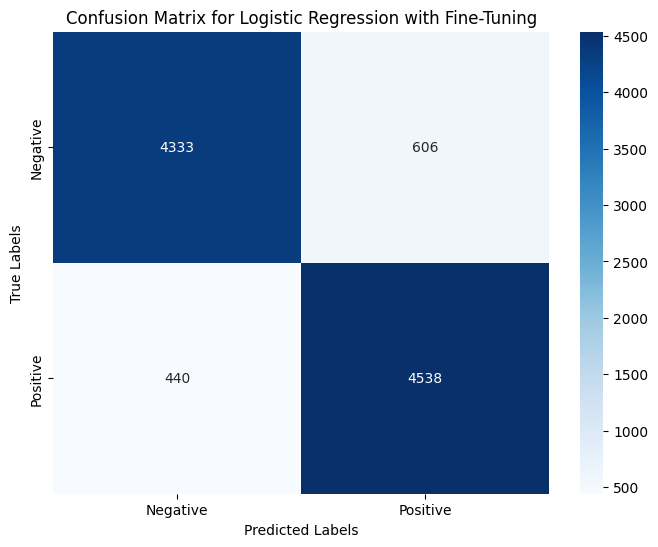

In [51]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_grid_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression with Fine-Tuning')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('LR_grid_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

#### Naive Bayes Hypertuning

In [52]:
%%time
# Create a pipeline
nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),        # Convert text to a matrix of token counts
    ('tfidf', TfidfTransformer()),      # Transform counts to TF-IDF scores
    ('clf', MultinomialNB()),           # Naive Bayes classifier
])

# Define the parameter grid to search
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],      # Unigrams or unigrams + bigrams
    'clf__alpha': [0.1, 0.5, 1.0],                   # Smoothing parameter for Naive Bayes
    # Removed tfidf__use_idf, tfidf__norm for faster execution
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 22.4 s
Wall time: 3min 18s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [53]:
# Best hyperparameters found
print(f'Best parameters found: {grid_search.best_params_}')

Best parameters found: {'clf__alpha': 0.5, 'vect__ngram_range': (1, 2)}


In [54]:
# Make predictions on the test set with the best model
y_grid_pred_nb = grid_search.best_estimator_.predict(X_test)

In [55]:
# Evaluate the results
print("Naive Bayes Results with Fine-Tuning:")
print(f'Accuracy: {accuracy_score(y_test, y_grid_pred_nb)}')
print(classification_report(y_test, y_grid_pred_nb))

Naive Bayes Results with Fine-Tuning:
Accuracy: 0.883835837450842
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4939
    positive       0.88      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



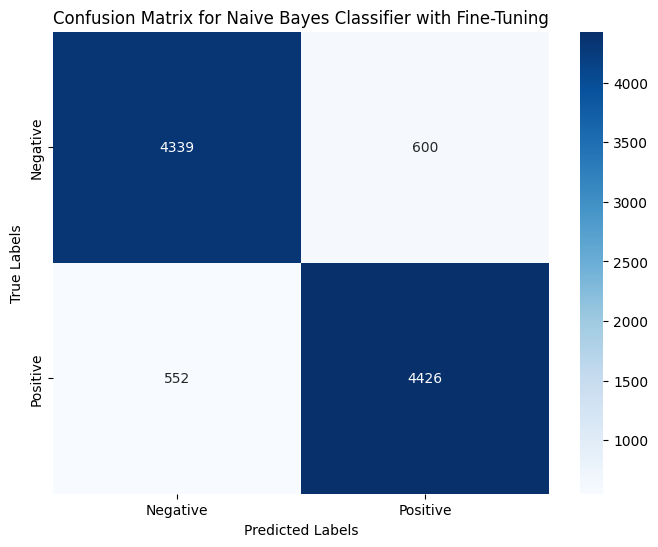

In [56]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_grid_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Naive Bayes Classifier with Fine-Tuning')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('NB_grid_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

### Deep Learning Models

#### Word embedding using pre-trained GloVe vectors

In [57]:
%%time

# Load pre-trained GloVe embeddings
def load_glove_embeddings(glove_file_path, embedding_dim):
    embeddings_index = {}
    with open(glove_file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Creating embedding matrix
def create_embedding_matrix(word_index, embeddings_index, embedding_dim, max_words):
    embedding_matrix = np.zeros((max_words, embedding_dim))
    hits = 0
    misses = 0
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
                hits += 1
            else:
                misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))
    return embedding_matrix

# Example usage
embedding_dim = 100  # Typically 50, 100, 200, 300
glove_file_path = "C:/Users/natha/Desktop/Trimester 2/AAI/Graded/Report/data 4/glove.6B/glove.6B.100d.txt"

# Load the GloVe embeddings
embeddings_index = load_glove_embeddings(glove_file_path, embedding_dim)

# Assume tokenizer is already fitted on your training data
word_index = tokenizer.word_index

# Assume max_words is defined
max_words = 5000

# Create the embedding matrix
embedding_matrix = create_embedding_matrix(word_index, embeddings_index, embedding_dim, max_words)

Converted 4886 words (113 misses)
CPU times: total: 6.56 s
Wall time: 10.3 s


#### LSTM GloVe

In [63]:
# LSTM GLOVE
model_LSTM2 = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, 
              input_length=max_length, weights=[embedding_matrix], trainable=True),
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dropout(0.3),
    Dense(1, activation = "sigmoid")
])
model_LSTM2.build(input_shape=(None, max_length))
model_LSTM2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

model_LSTM2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 256)            │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,391,137 (5.31 MB)

 Trainable params: 1,391,137 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
%%time
# Training the model
history3 = model_LSTM2.fit(train_x1_padded, train_y1, epochs=5, batch_size=32, validation_data=(test_x1_padded, test_y1))

Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 536s 405ms/step - accuracy: 0.5232 - loss: 0.6961 - val_accuracy: 0.8332 - val_loss: 0.3967
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 486s 392ms/step - accuracy: 0.8471 - loss: 0.3671 - val_accuracy: 0.8667 - val_loss: 0.3446
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 490s 395ms/step - accuracy: 0.8889 - loss: 0.2792 - val_accuracy: 0.8658 - val_loss: 0.3187
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 491s 396ms/step - accuracy: 0.9094 - loss: 0.2339 - val_accuracy: 0.8621 - val_loss: 0.3489
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 492s 397ms/step - accuracy: 0.9254 - loss: 0.1995 - val_accuracy: 0.8636 - val_loss: 0.3744
CPU times: total: 1h 39min 7s
Wall time: 41min 34s


In [71]:
# Load the entire model from the file
model_LSTM2 = load_model('best_model.keras')

In [72]:
# Evaluate the model
lstm_glove_pred = (model_LSTM2.predict(test_x1_padded) > 0.5).astype(int)
print("LSTM with Pre-trained Embeddings:\n", classification_report(test_y1, lstm_glove_pred, target_names=['negative', 'positive']))

310/310 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step
LSTM with Pre-trained Embeddings:
               precision    recall  f1-score   support

    negative       0.88      0.87      0.87      4939
    positive       0.87      0.88      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



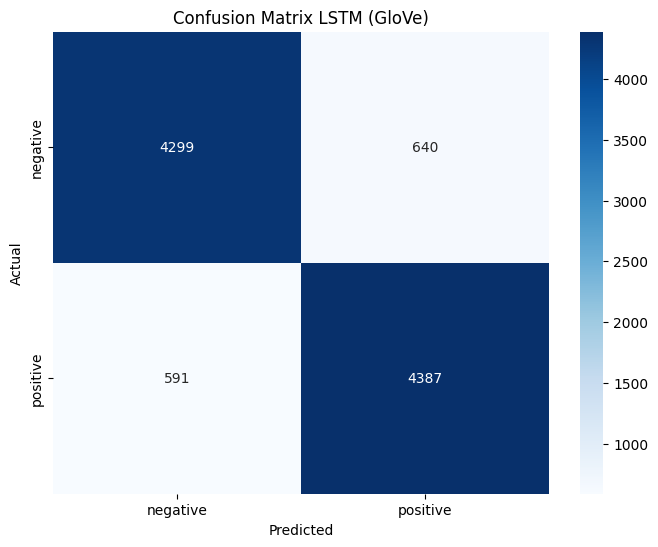

In [73]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y1, lstm_glove_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix LSTM (GloVe)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('LSTM_glove_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

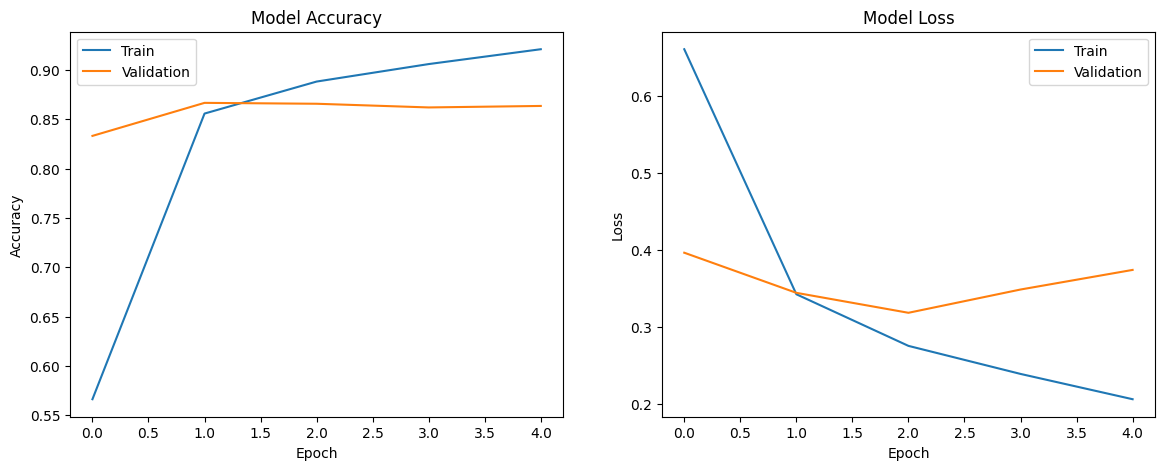

In [74]:
# Plotting the training history
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns, adjust figure size as needed

# Plot training & validation accuracy values on the first subplot
ax[0].plot(history3.history['accuracy'])
ax[0].plot(history3.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values on the second subplot
ax[1].plot(history3.history['loss'])
ax[1].plot(history3.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

# Save the plot
plt.savefig('LSTM_glove_Loss_Accuracy.png')
# Display the plots
plt.show()

#### GRU GloVe

In [75]:
# GRU GLOVE
model_GRU2 = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),
    GRU(256, return_sequences=True),
    Dropout(0.3),
    GRU(256),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model_GRU2.build(input_shape=(None, max_length))
model_GRU2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
model_GRU2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100, 256)            │         274,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 256)                 │         394,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169,953 (4.46 MB)

 Trainable params: 1,169,953 (4.46 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
%%time
# Training the model
history4 = model_GRU2.fit(train_x1_padded, train_y1, epochs=5, batch_size=32, validation_data=(test_x1_padded, test_y1), callbacks=[model_checkpoint])

Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 413s 329ms/step - accuracy: 0.6488 - loss: 0.5848 - val_accuracy: 0.8679 - val_loss: 0.3121
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 402s 324ms/step - accuracy: 0.8878 - loss: 0.2704 - val_accuracy: 0.8788 - val_loss: 0.2948
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 411s 331ms/step - accuracy: 0.9150 - loss: 0.2190 - val_accuracy: 0.8704 - val_loss: 0.3128
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 408s 329ms/step - accuracy: 0.9382 - loss: 0.1669 - val_accuracy: 0.8672 - val_loss: 0.3603
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 440s 328ms/step - accuracy: 0.9610 - loss: 0.1135 - val_accuracy: 0.8597 - val_loss: 0.4039
CPU times: total: 1h 18min 25s
Wall time: 34min 34s


In [77]:
# Evaluate the best model
model_GRU2.load_weights('best_model.keras')

In [78]:
# Evaluate the model
gru_glove_pred = (model_GRU2.predict(test_x1_padded) > 0.5).astype(int)
print("GRU with Pre-trained Embeddings:\n", classification_report(test_y1, gru_glove_pred, target_names=['negative', 'positive']))

310/310 ━━━━━━━━━━━━━━━━━━━━ 51s 88ms/step
GRU with Pre-trained Embeddings:
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4939
    positive       0.87      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



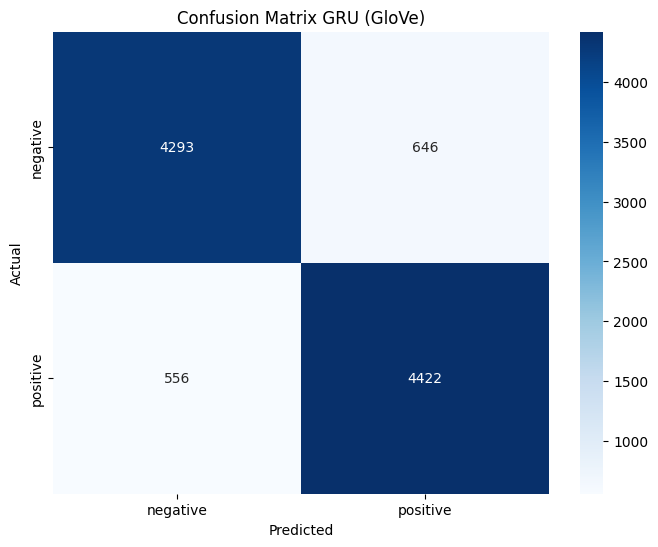

In [79]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y1, gru_glove_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix GRU (GloVe)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('GRU_glove_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

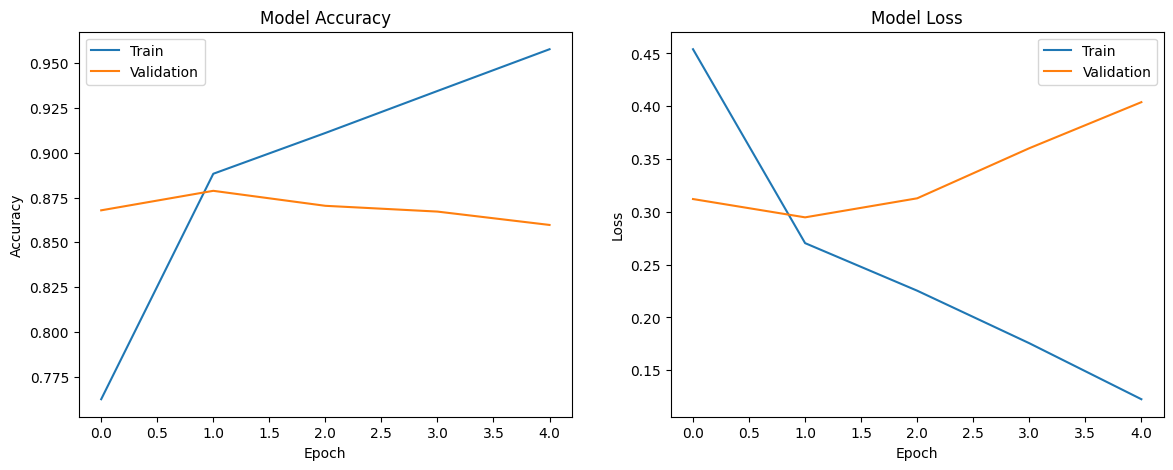

In [80]:
# Plotting the training history
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns, adjust figure size as needed

# Plot training & validation accuracy values on the first subplot
ax[0].plot(history4.history['accuracy'])
ax[0].plot(history4.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values on the second subplot
ax[1].plot(history4.history['loss'])
ax[1].plot(history4.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

# Save the plot
plt.savefig('GRU_glove_Loss_Accuracy.png')

# Display the plots
plt.show()

# References

The codes on this notebook follow the tutorials from these websides: 

https://scikit-learn.org/1.4/tutorial/text_analytics/working_with_text_data.html

https://www.kaggle.com/code/naimatasnia/imdb-movie-sentiment-analysis-using-ml-and-dl

https://www.kaggle.com/code/phillipgregory1994/lstm-sentiment-analysis-for-mental-health

https://www.kaggle.com/code/sakiiib/sentiment-analysis-with-gru

https://www.kaggle.com/code/mikolajhojda/twitter-sentiment-analysis-using-ann-glove